<a href="https://colab.research.google.com/github/MuhammadRhakan/final-project/blob/main/Course_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install kagglehub
!pip install squarify
!pip install kagglehub[pandas-datasets]

In [83]:
import kagglehub
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import plotly.express as px

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler, RobustScaler

In [84]:
course = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "hossaingh/udemy-courses",  #dataset handle
    "Course_info.csv" #dataset name
)
time.sleep(10) #delay 10 second to ensure all data is stored
course.shape

<ipython-input-84-068efce8630b>:1: DeprecationWarning:

load_dataset is deprecated and will be removed in a future version.



(209734, 20)

In [85]:
course.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [86]:
course_filter_lang = course[course['language'].isin({'English', 'Indonesian'})]
course_filter_lang.shape

(125501, 20)

In [87]:
course_filter_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125501 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  125501 non-null  float64
 1   title               125501 non-null  object 
 2   is_paid             125501 non-null  bool   
 3   price               125501 non-null  float64
 4   headline            125481 non-null  object 
 5   num_subscribers     125501 non-null  float64
 6   avg_rating          125501 non-null  float64
 7   num_reviews         125501 non-null  float64
 8   num_comments        125501 non-null  float64
 9   num_lectures        125501 non-null  float64
 10  content_length_min  125501 non-null  float64
 11  published_time      125501 non-null  object 
 12  last_update_date    125374 non-null  object 
 13  category            125501 non-null  object 
 14  subcategory         125501 non-null  object 
 15  topic               124938 non-null  ob

In [88]:
#check unique values for each column
print(course_filter_lang.nunique().reset_index().set_axis(['Features', 'Unique Values'], axis=1).to_markdown(tablefmt='outline'))

+----+--------------------+-----------------+
|    | Features           |   Unique Values |
+====+====================+=================+
|  0 | id                 |          125501 |
|  1 | title              |          124497 |
|  2 | is_paid            |               2 |
|  3 | price              |             161 |
|  4 | headline           |          121424 |
|  5 | num_subscribers    |           18370 |
|  6 | avg_rating         |            5573 |
|  7 | num_reviews        |            4321 |
|  8 | num_comments       |            1734 |
|  9 | num_lectures       |             643 |
| 10 | content_length_min |            2763 |
| 11 | published_time     |          125433 |
| 12 | last_update_date   |            3511 |
| 13 | category           |              13 |
| 14 | subcategory        |             130 |
| 15 | topic              |            3743 |
| 16 | language           |               2 |
| 17 | course_url         |          125501 |
| 18 | instructor_name    |       

In [89]:
#check duplicates
def duplicate_check(data):
  print("\n📌 Checking for Duplicate Values")
  print("-" * 45)

  duplicated_rows = data.duplicated().sum()
  if data.duplicated().any():
    print("\n⚠️ Duplicate values found! Cleaning up...")
    print("🔄 Removing duplicates...")
    data = data.drop_duplicates()
    print(f"✅ Done! {duplicated_rows} duplicates have been removed.\n")
  else:
    print("\n✅ No duplicate values found. Data is clean!\n")

  print("-" * 45)

  return data

course_no_duplicate = duplicate_check(course_filter_lang)


📌 Checking for Duplicate Values
---------------------------------------------

✅ No duplicate values found. Data is clean!

---------------------------------------------


In [90]:
#check missing values
def missing_values_check(data):
  print("\n📌 Checking for Missing Values")
  print("🔄 Showing missing values...\n")

  percentage = (data.isnull().sum() / data.shape[0]) * 100
  missing_values = pd.DataFrame({
      'Features': data.columns,
      'Missing Values': data.isnull().sum(),
      'Percentage': [f'{round(value,2)}%' for value in percentage]
      })
  missing_values.reset_index(drop=True, inplace=True)

  print(missing_values.to_markdown(tablefmt='pipe', index=False))

missing_values_check(course_no_duplicate)


📌 Checking for Missing Values
🔄 Showing missing values...

| Features           |   Missing Values | Percentage   |
|:-------------------|-----------------:|:-------------|
| id                 |                0 | 0.0%         |
| title              |                0 | 0.0%         |
| is_paid            |                0 | 0.0%         |
| price              |                0 | 0.0%         |
| headline           |               20 | 0.02%        |
| num_subscribers    |                0 | 0.0%         |
| avg_rating         |                0 | 0.0%         |
| num_reviews        |                0 | 0.0%         |
| num_comments       |                0 | 0.0%         |
| num_lectures       |                0 | 0.0%         |
| content_length_min |                0 | 0.0%         |
| published_time     |                0 | 0.0%         |
| last_update_date   |              127 | 0.1%         |
| category           |                0 | 0.0%         |
| subcategory        |      

In [91]:
#keep it blank for later

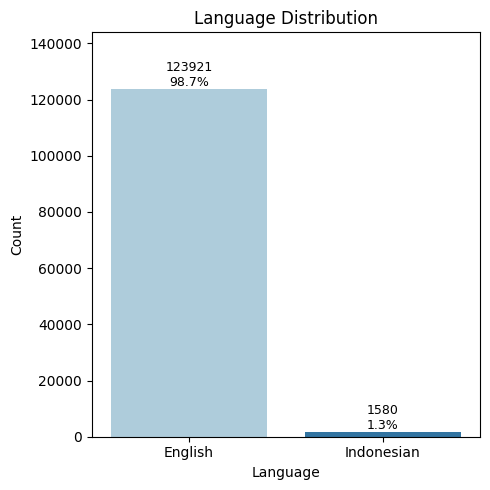

In [92]:
#check language distribution
def language_distribution(data, lang):
  plt.figure(figsize=(5,5))
  graph = sns.countplot(x=lang, data=data, width=0.8, palette='Paired', hue=lang, legend=False)

  for bar in graph.patches:
      count = int(bar.get_height())
      percentage = (count / len(data)) * 100
      label = f"{count}\n{percentage:.1f}%"
      graph.annotate(label,
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom', fontsize=9)

  plt.title('Language Distribution')
  plt.xlabel('Language')
  plt.ylabel('Count')
  plt.ylim(0, max(data[lang].value_counts()) + 20000)

  plt.tight_layout()
  plt.show()

language_distribution(course_no_duplicate, 'language')

In [93]:
 #define categorical and numerical attributes
 def attributes(data, to_move):
  categorical = []
  print(f"Categorical Attributes:")
  for i, cat in enumerate(data.select_dtypes(include = ['object', 'bool']).columns.values):
    categorical.append(cat)
    print(f"{i+1}. {cat}")
  categorical.append(to_move)
  print(f"{len(categorical)}. {to_move}")  # manually print it

  numerical = []
  print(f"\nNumerical Attributes:")
  for i, num in enumerate(data.select_dtypes(include = 'number').drop(columns='id').columns.values):
    if num != to_move:
      numerical.append(num)
      print(f"{i+1}. {num}")

  return categorical, numerical

categorical, numerical = attributes(course_no_duplicate, 'avg_rating')

Categorical Attributes:
1. title
2. is_paid
3. headline
4. published_time
5. last_update_date
6. category
7. subcategory
8. topic
9. language
10. course_url
11. instructor_name
12. instructor_url
13. avg_rating

Numerical Attributes:
1. price
2. num_subscribers
4. num_reviews
5. num_comments
6. num_lectures
7. content_length_min


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



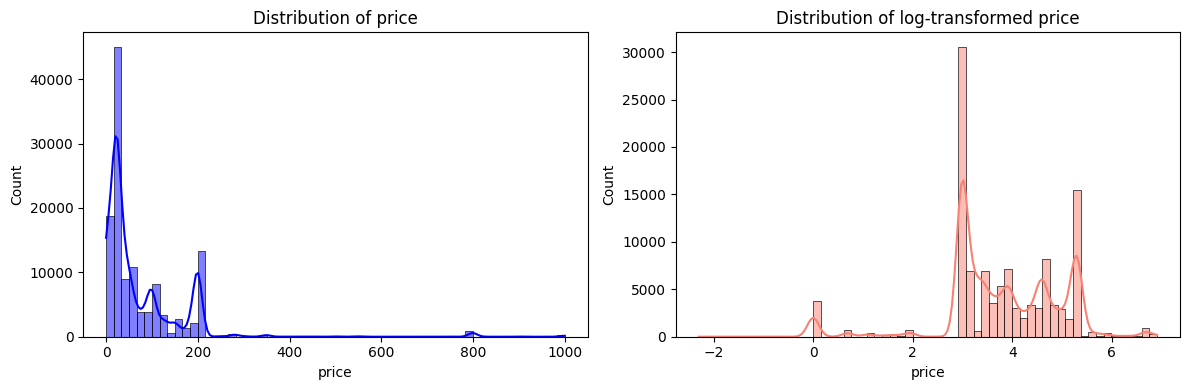

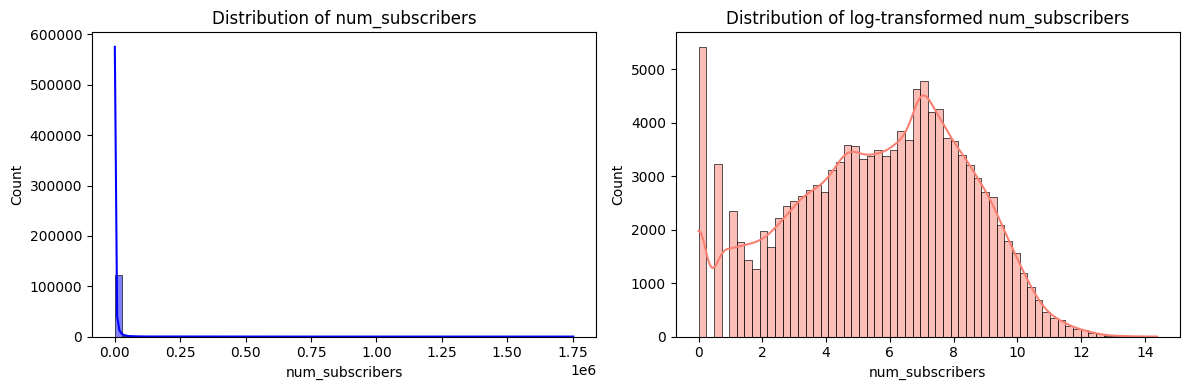

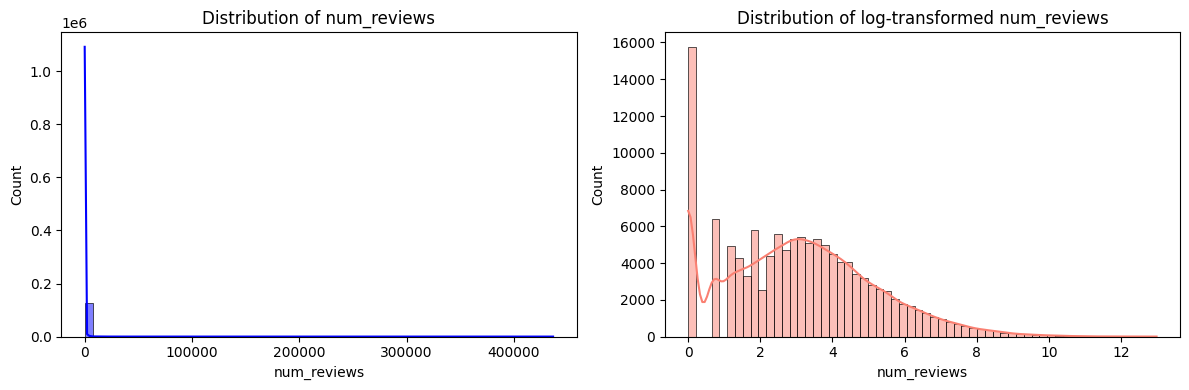

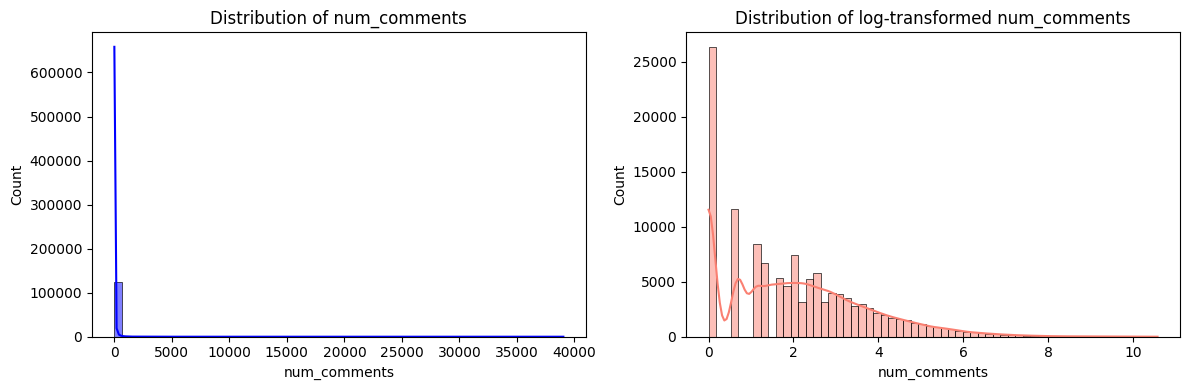

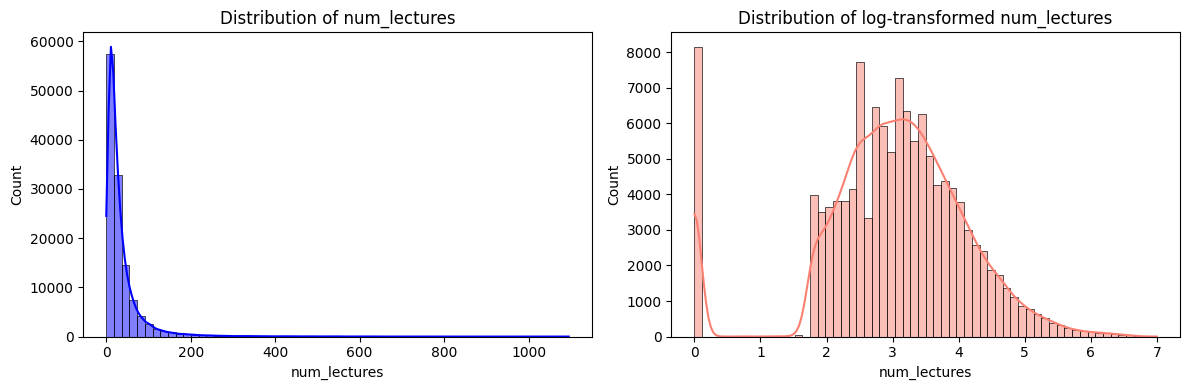

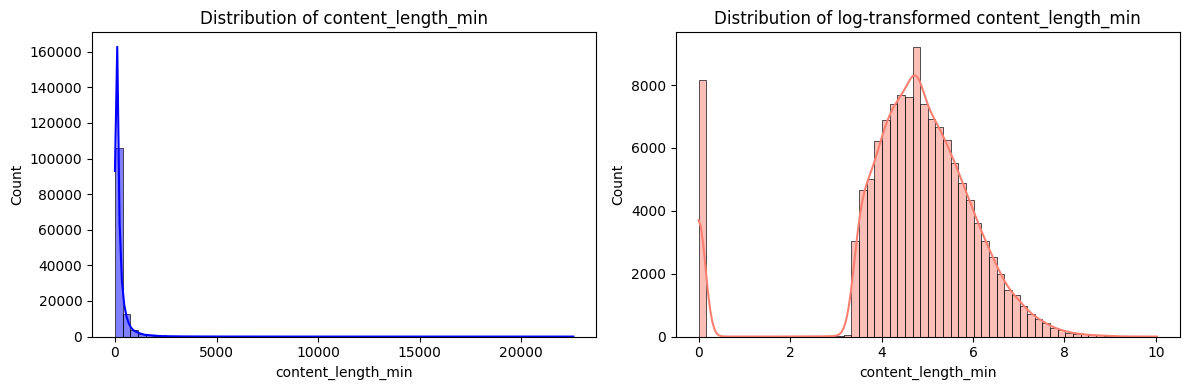

In [94]:
#check distribution with histogram
def numerical_histogram(data, numeric):
  for i in numeric:

    if i =='price':
      log = np.log(data[i])
    else:
      log = np.log1p(data[i])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(data[i], kde=True, bins=60, color='blue')
    plt.title(f'Distribution of {i}')

    plt.subplot(1,2,2)
    sns.histplot(log, kde=True, bins=60, color='salmon')
    plt.title(f'Distribution of log-transformed {i}')

    plt.tight_layout()
    plt.show()

numerical_histogram(course_no_duplicate, numerical)

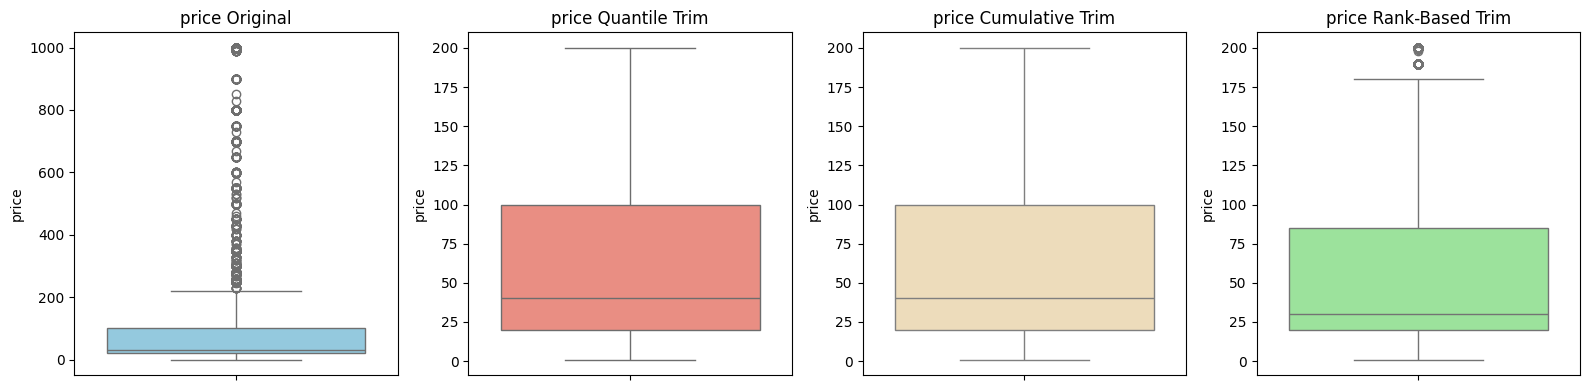

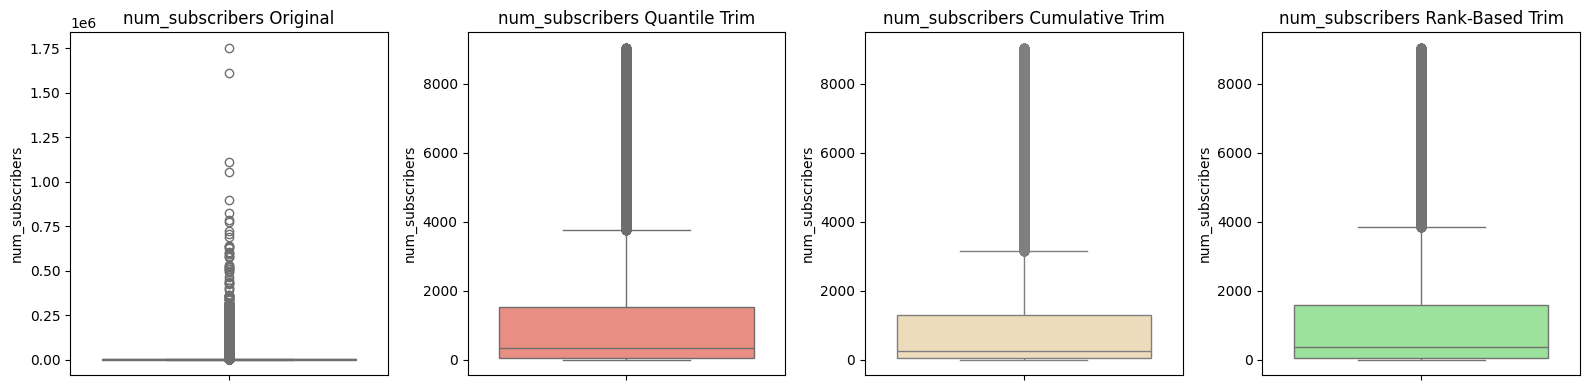

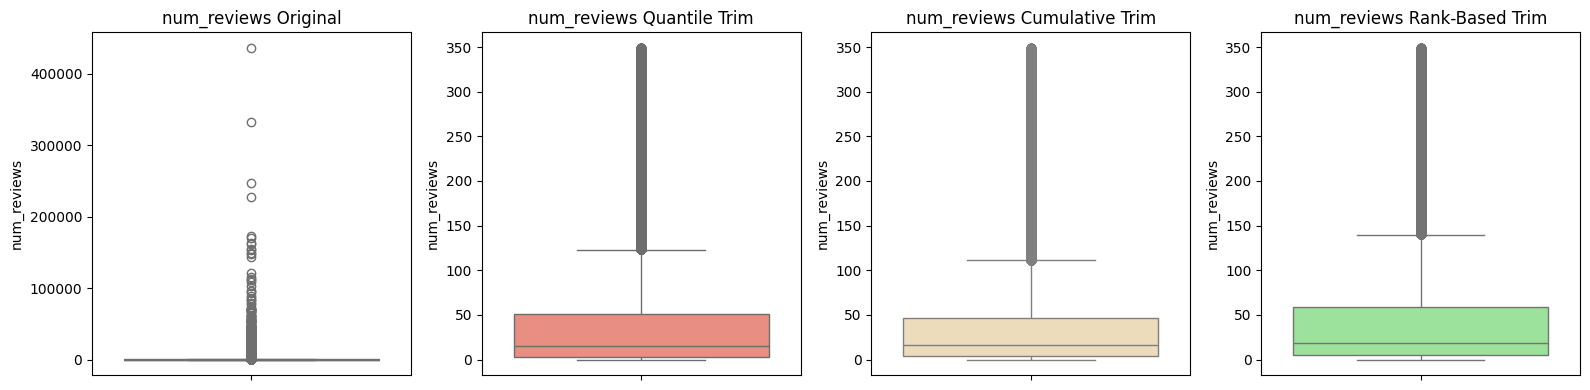

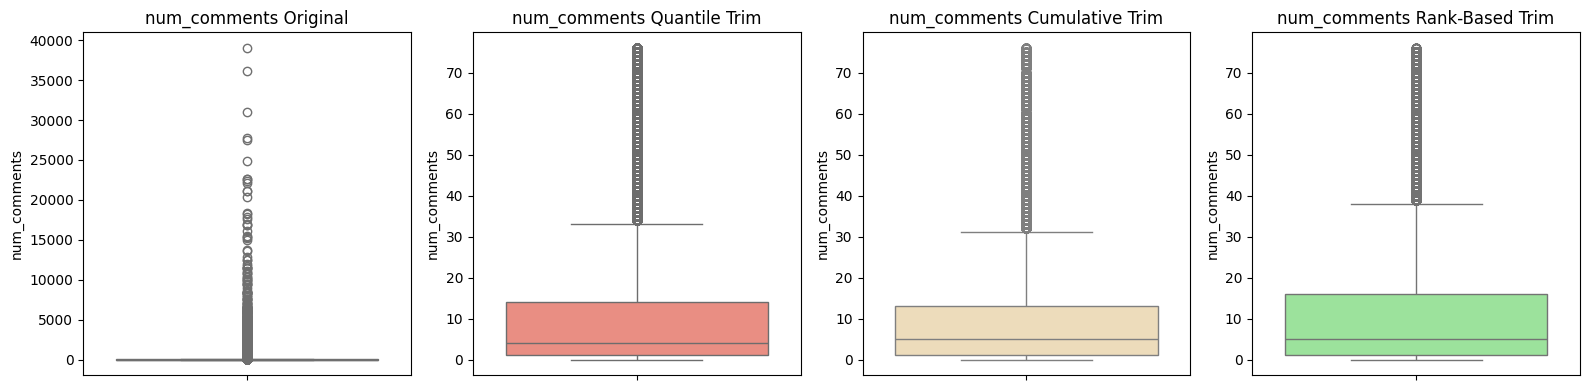

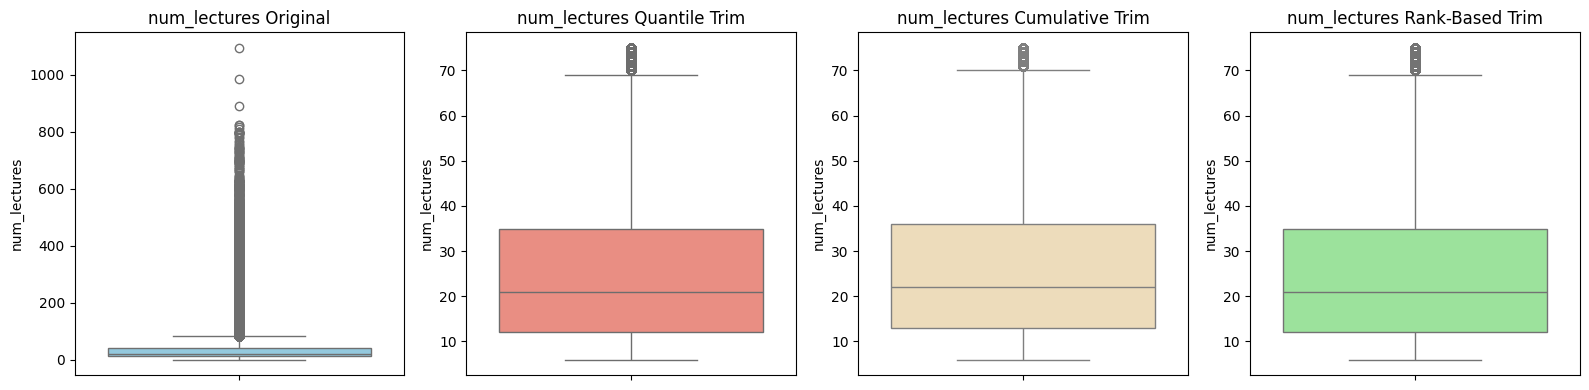

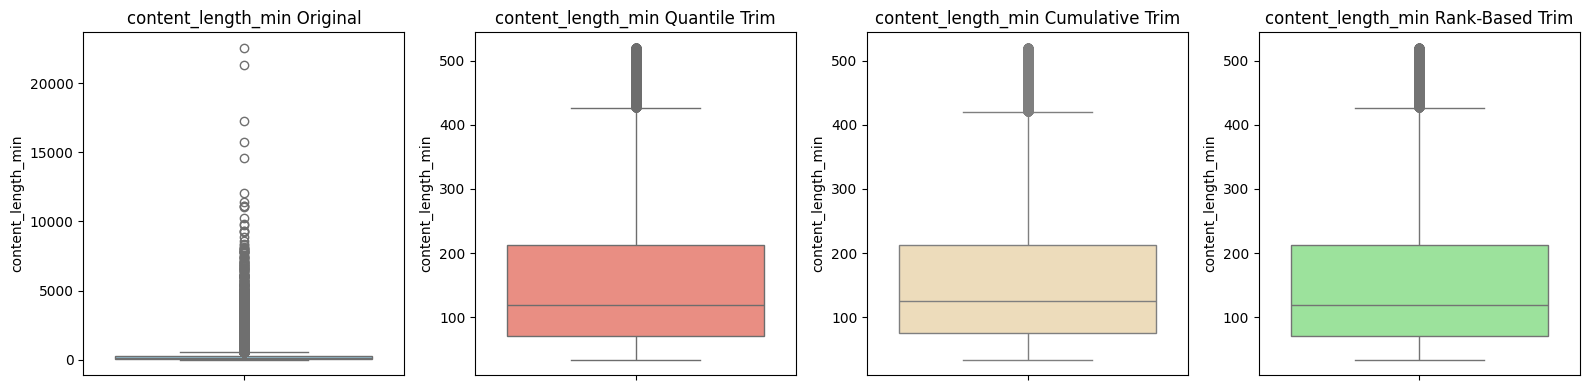

In [123]:
def outliers_finding(data, features, alpha=0.1):
  data = data.copy()
  ctrim = data.copy()

  for column in features:
    # Quantile-based trimming (5/95 or 10/90)
    pr_max = data[column].quantile(0.9)
    pr_min = data[column].quantile(0.1)
    trim = data[(data[column] >= pr_min) & (data[column] <= pr_max)]
    ctrim = ctrim[(ctrim[column] >= pr_min) & (ctrim[column] <= pr_max)]

    # Rank-based symmetric trimming (Wilcox-style)
    sorted_col = data[column].sort_values()
    n = len(sorted_col)
    k = int(alpha * n)
    trimmed_col = sorted_col.iloc[k : n - k]
    rtrim = data.loc[trimmed_col.index]

    features_tracking = {
      'Original': (data[column], 'skyblue'),
      'Quantile Trim': (trim[column], 'salmon'),
      'Cumulative Trim': (ctrim[column], 'wheat'),
      'Rank-Based Trim': (rtrim[column], 'lightgreen')}

    plt.figure(figsize=(16, 4))
    for i, (title, (subset, color)) in enumerate(features_tracking.items(), 1):
      plt.subplot(1, 4, i)
      sns.boxplot(subset, color=color)
      plt.title(f'{column} {title}')

    plt.tight_layout()
    plt.show()


outliers_finding(course_no_duplicate, numerical)

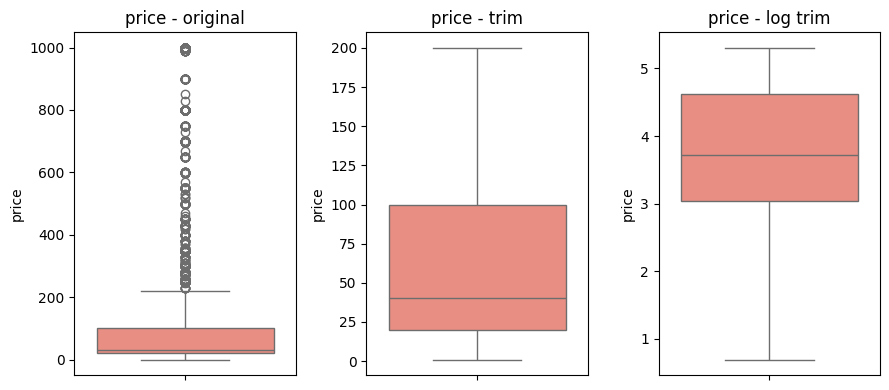

Current Column: price
Length Original: (125501, 21)
Length After Trim: (110540, 21)



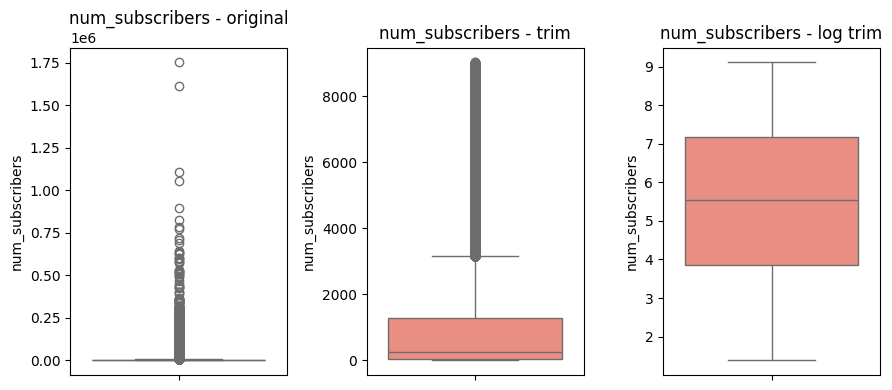

Current Column: num_subscribers
Length Original: (125501, 21)
Length After Trim: (90406, 21)



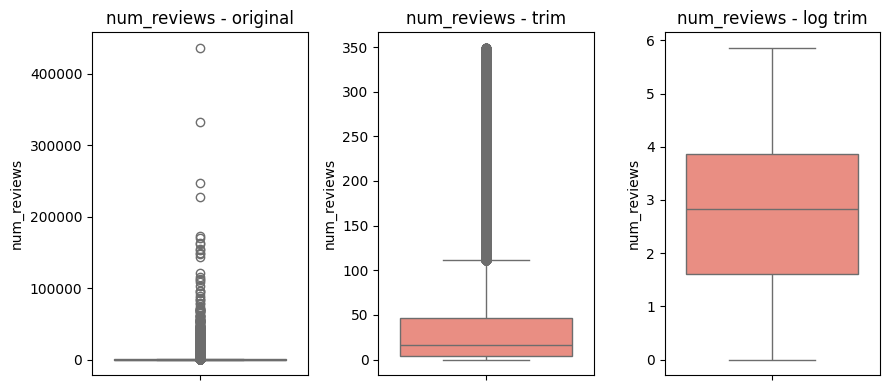

Current Column: num_reviews
Length Original: (125501, 21)
Length After Trim: (84806, 21)



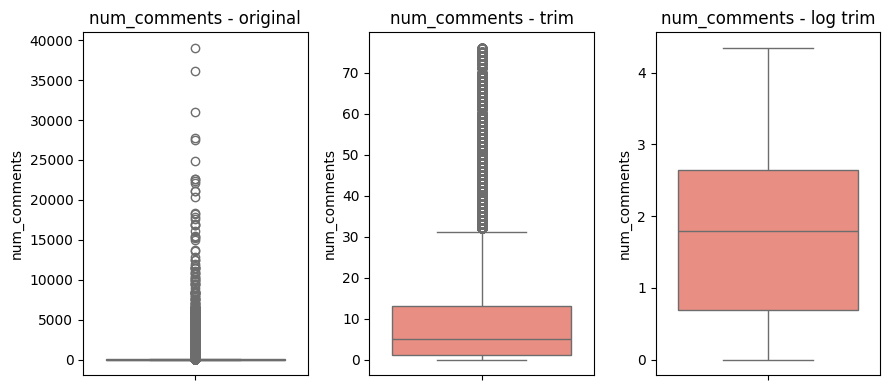

Current Column: num_comments
Length Original: (125501, 21)
Length After Trim: (83633, 21)



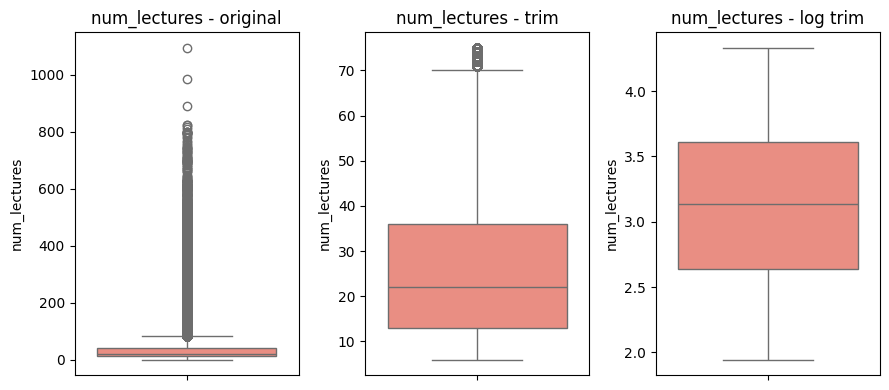

Current Column: num_lectures
Length Original: (125501, 21)
Length After Trim: (68286, 21)



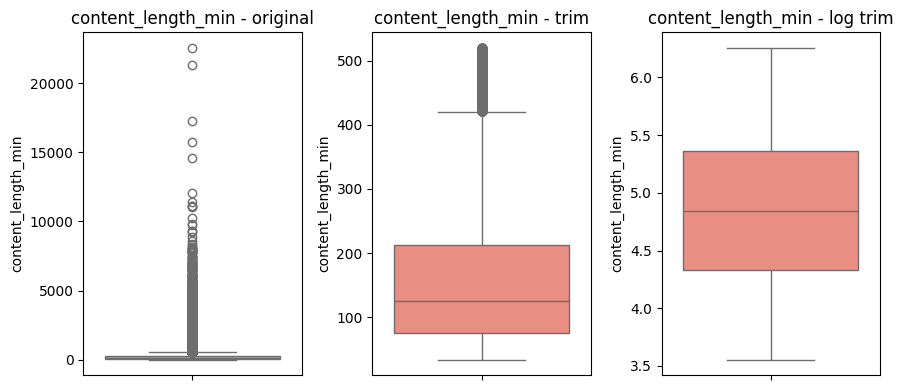

Current Column: content_length_min
Length Original: (125501, 21)
Length After Trim: (63273, 21)



,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,rating
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,3.044046,Get the tools you need for a lifestyle change ...,7.446585,4.400000,3.737670,2.639057,2.708050,...,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/,4
10,8318.0,Navigating the MBA Admissions Process,True,3.931630,MBA Admission: The Complete Course on How to G...,6.678342,4.100000,3.332205,2.833213,2.397895,...,2011-07-12T04:11:59Z,NaN,Teaching & Academics,Teacher Training,MBA Admissions,English,/course/business-school/,Clear Admit & Beat The GMAT,/user/clearadmitbeatthegmat/,4
16,8471.0,Healthy Cooking Fundamentals,True,3.433665,"Cathy Erway, a noted New York based chef, auth...",6.226537,3.250000,3.218876,1.386294,2.995732,...,2011-07-18T23:54:24Z,NaN,Lifestyle,Food & Beverage,Cooking,English,/course/healthy-cooking-fundamentals/,Cathy Erway,/user/cathyerway2/,3
17,8319.0,Git Basics: In Theory and Practice,True,3.044046,Learn Effective Source Control Management with...,5.693732,3.750000,2.639057,2.197225,3.465736,...,2011-07-29T20:24:56Z,NaN,Development,Software Development Tools,Git,English,/course/git-in-theory-and-in-practice/,Tony Hillerson,/user/tonyhillerson/,4
18,8410.0,Intro to Adobe InDesign,True,3.257712,Learn Adobe InDesign with design expert Joseph...,7.635304,4.100000,5.153292,4.158883,3.988984,...,2011-07-29T10:08:39Z,2013-02-28,Design,Design Tools,InDesign,English,/course/intro-to-adobe-indesign/,Joseph Caserto,/user/josephcaserto2/,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209706,4912084.0,Spiritual Mindfulness,True,3.257712,Vedic Wisdom Series,2.708050,5.000000,1.791759,1.945910,2.484907,...,2022-10-05T08:10:11Z,2022-10-06,Personal Development,Religion & Spirituality,Spirituality,English,/course/spiritual-mindfulness-b/,Akshay Yewale,/user/akshay-yewale-3/,5
209711,4912594.0,Marketing on Instagram,True,3.583241,Marketing your business on Instagram,5.332719,4.650000,2.397895,0.693147,4.043051,...,2022-10-04T17:43:05Z,2022-10-10,Marketing,Social Media Marketing,Salesforce Certified Marketing Cloud Consultant,English,/course/marketing-on-instagram-r/,Sadık Vural,/user/sadik-vural-2/,5
209719,4911668.0,Passive Income on Fiverr using Grammarly and Z...,True,4.454231,Write SEO content copy as complete beginner & ...,7.605890,4.214286,2.302585,1.609438,3.637586,...,2022-10-05T04:43:41Z,2022-10-04,Business,Entrepreneurship,Copywriting,English,/course/passive-income-on-fiverr-using-grammar...,Passive Income Gen Z,/user/hamza-rouane/,4
209722,4913390.0,Practical Magick Part 1 with Patti Negri,True,3.044046,Useful Tips to Make Your Daily Life more Magickal,1.609438,0.000000,0.000000,0.000000,2.079442,...,2022-10-05T06:25:32Z,2022-10-04,Lifestyle,Esoteric Practices,Witchcraft,English,/course/practical-magick-for-the-modern-witch-...,Magick U,/user/academy-magickus/,0


In [132]:
def outlier_handling(data, features):
  data = data.copy()
  trim = data.copy()

  for column in features:
    pr_max = data[column].quantile(0.9)
    pr_min = data[column].quantile(0.1)
    trim = trim[(trim[column] >= pr_min) & (trim[column] <= pr_max)]
    log_trim = np.log1p(trim[column])

    version = {
        'original': data[column],
        'trim': trim[column],
        'log trim': log_trim}

    plt.figure(figsize=(3 * len(version),4))

    for i, (key, values) in enumerate(version.items(),1):
      plt.subplot(1, len(version), i)
      sns.boxplot(values, color='salmon')
      plt.title(f'{column} - {key}')

    plt.tight_layout()
    plt.show()

    print(f'Current Column: {column}')
    print(f'Length Original: {data.shape}')
    print(f'Length After Trim: {trim.shape}\n')

  for column in features:
    trim[column] = np.log1p(trim[column])

  return trim

outlier_handling(course_no_duplicate, numerical)

In [98]:
def basic_statistics(data, features):
    table = data[features].describe().T
    table['IQR'] = table['75%'] - table['25%']
    table['upper bound'] = table['75%'] + 1.5 * table['IQR']
    table['lower bound'] = table['25%'] - 1.5 * table['IQR']

    table = table.round(2)

    return table


def comparison(data, feature):
  stats = basic_statistics(data, feature)
  print(f"Original Data\n{stats.to_markdown(tablefmt='outline')}\n")

comparison(course_no_duplicate, numerical)

Original Data
+--------------------+---------+---------+----------+-------+-------+--------+---------+------------------+-------+---------------+---------------+
|                    |   count |    mean |      std |   min |   25% |    50% |     75% |              max |   IQR |   upper bound |   lower bound |
+====================+=========+=========+==========+=======+=======+========+=========+==================+=======+===============+===============+
| price              |  125501 |   72.24 |   102.09 |     0 | 19.99 |  29.99 |   99.99 |    999           |    80 |        219.99 |       -100.01 |
| num_subscribers    |  125501 | 4230.43 | 19318.6  |     0 | 34    | 357    | 2254    |      1.75236e+06 |  2220 |       5584    |      -3296    |
| num_reviews        |  125501 |  308.51 |  3080.75 |     0 |  4    |  19    |   82    | 436457           |    78 |        199    |       -113    |
| num_comments       |  125501 |   54.16 |   433.73 |     0 |  1    |   5    |   21    |  39040   

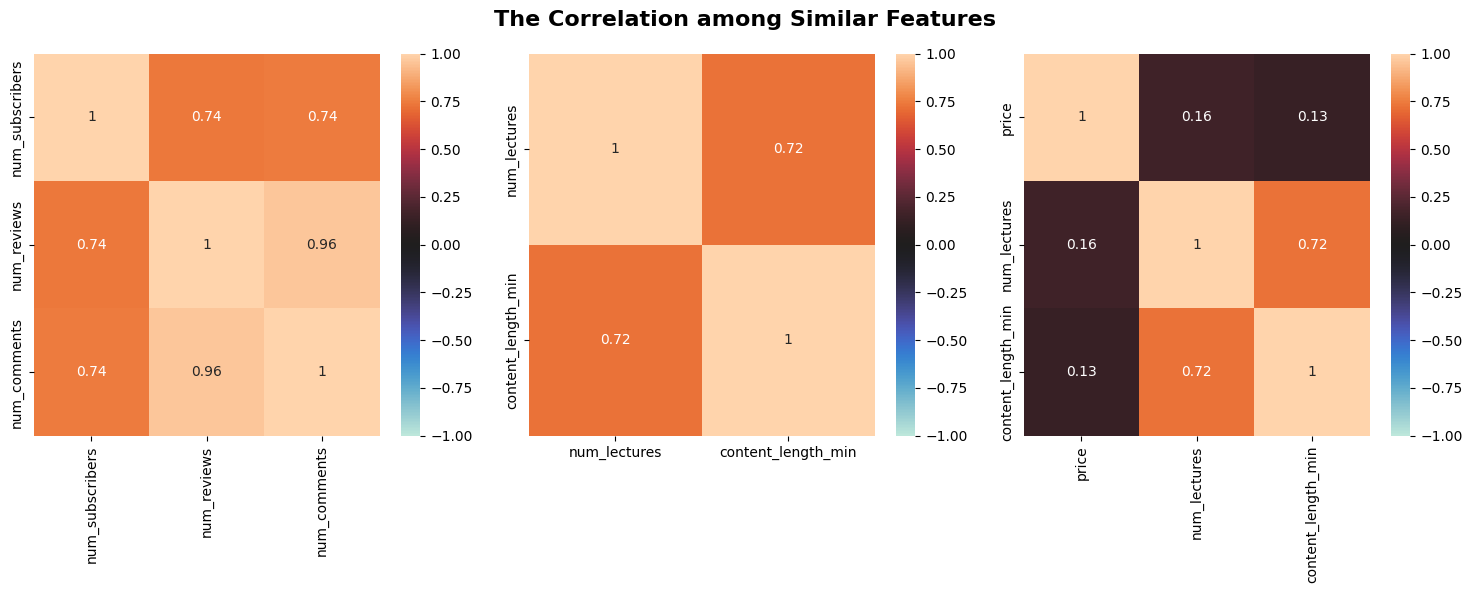

In [131]:
def correlation(data):
  feature = {
      'engagement': ['num_subscribers', 'num_reviews', 'num_comments'],
      'duration': ['num_lectures', 'content_length_min'],
      'resource': ['price', 'num_lectures', 'content_length_min']}

  plt.figure(figsize=(5 * len(feature),6))
  plt.suptitle("The Correlation among Similar Features", fontweight='bold', fontsize=16)

  for i, col in enumerate(feature.values(), 1):
    plt.subplot(1,3,i)
    sns.heatmap(data[col].corr(),
                annot=True,
                center=0,
                vmin=-1,
                vmax=1)

  plt.tight_layout()
  plt.show()

correlation(course_no_duplicate)

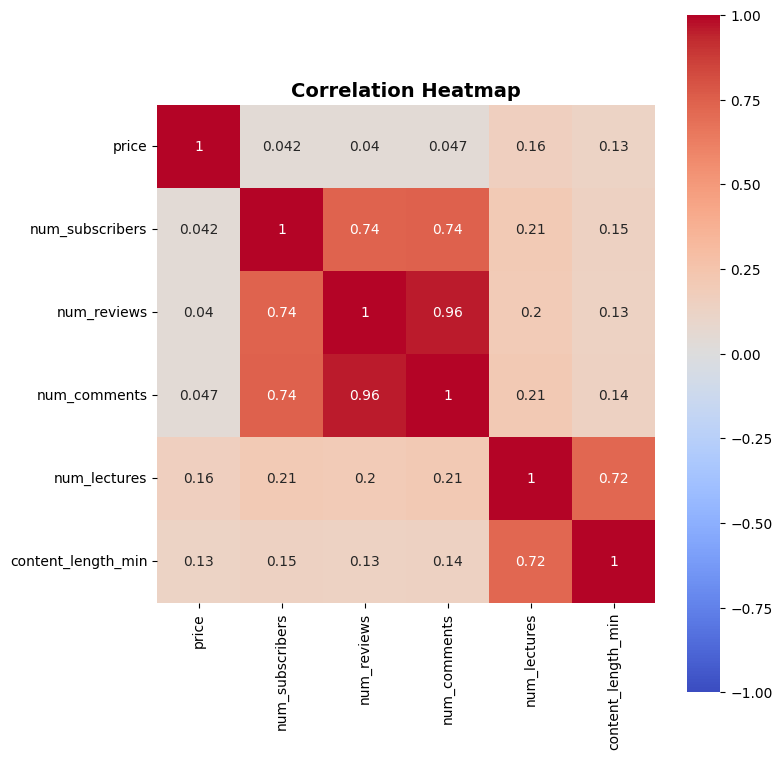

In [126]:
def heatmap(data, features):
  plt.figure(figsize=(8,8))
  sns.heatmap(data[features].corr(),
              annot=True,
              center=0,
              vmin=-1,
              vmax=1,
              cmap='coolwarm',
              square=True)

  plt.title('Correlation Heatmap', fontweight='bold', fontsize=14)

  plt.tight_layout()
  plt.show()

heatmap(course_no_duplicate, numerical)

In [100]:
def correlation(data, features):
    corr_matrix = data[features].corr()
    corr_matrix = corr_matrix.map(lambda x: x if x >= 0.7 else '-')
    return corr_matrix

correlation(course_no_duplicate, numerical)

,price,num_subscribers,num_reviews,num_comments,num_lectures,content_length_min
price,1.0,-,-,-,-,-
num_subscribers,-,1.0,0.741788,0.742205,-,-
num_reviews,-,0.741788,1.0,0.957098,-,-
num_comments,-,0.742205,0.957098,1.0,-,-
num_lectures,-,-,-,-,1.0,0.719745
content_length_min,-,-,-,-,0.719745,1.0


<ipython-input-101-f0e311a5ba6f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



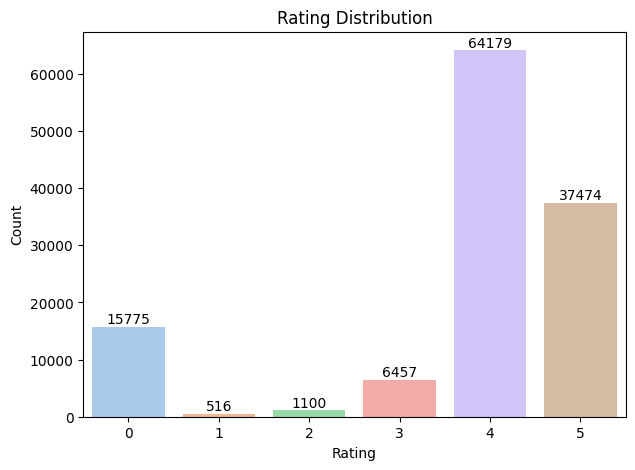

In [101]:
def rating_distribution(data, feature):
  data.loc[:,'rating'] = data[feature].round().astype(int)

  plt.figure(figsize=(7,5))
  graph = sns.countplot(x='rating', data=data, width=0.8, palette='pastel', hue='rating', legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.title('Rating Distribution')
  plt.xlabel('Rating')
  plt.ylabel('Count')

  plt.show()

rating_distribution(course_no_duplicate, 'avg_rating')

In [ ]:
def datetime_convert(data, features):
  data = data.copy()
  latest_date = '2022-10-10'
  latest_date = pd.to_datetime(latest_date, format='%Y-%m-%d').tz_localize(None)

  for col in features:
      data[col] = pd.to_datetime(data[col]).dt.tz_localize(None)

  data['published_year'] = data['published_time'].dt.year
  data['published_month'] = data['published_time'].dt.month_name()

  group_year = pd.pivot_table(data, index='published_year',
                               values=['id','num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'],
                               aggfunc={'id': len,
                                        'num_subscribers': 'sum',
                                        'num_reviews':'sum',
                                        'num_comments':'sum',
                                        'num_lectures':'sum'})

  data['published_days_ago'] = (latest_date - data['published_time']).dt.days
  data['updated_days_ago'] = (latest_date - data['last_update_date']).dt.days

  return {1: data,
          2: group_year}

datetime_convert(course_no_duplicate, ['published_time', 'last_update_date'])

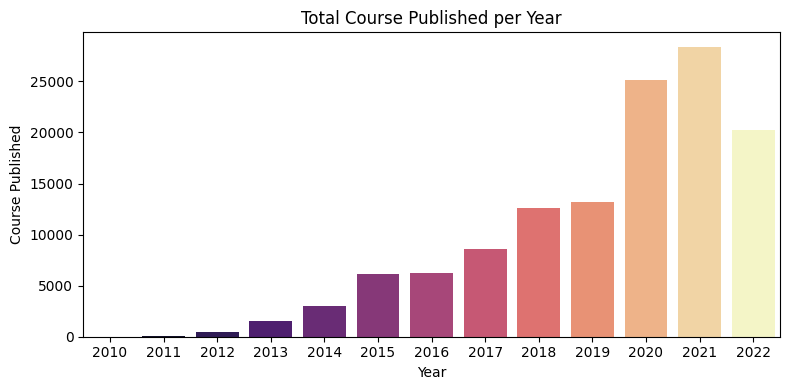

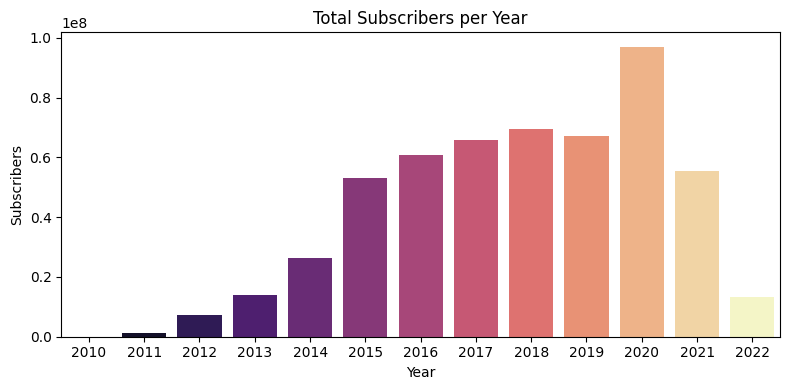

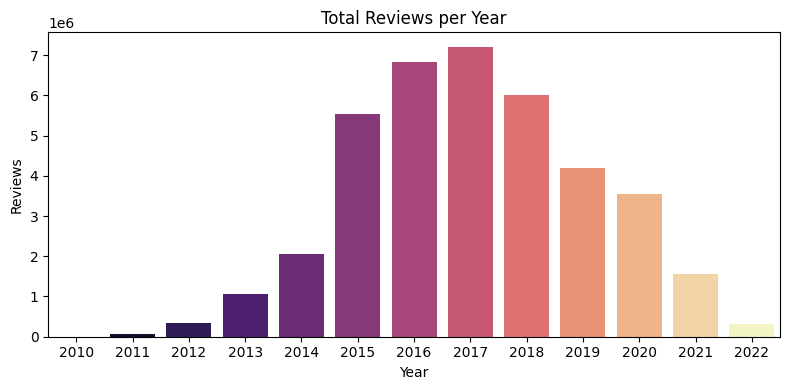

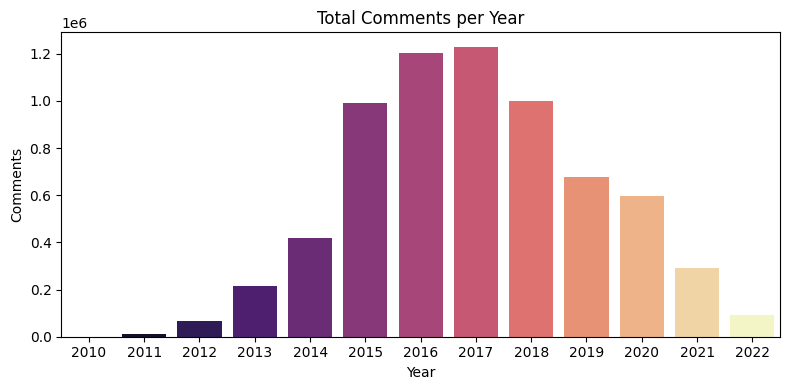

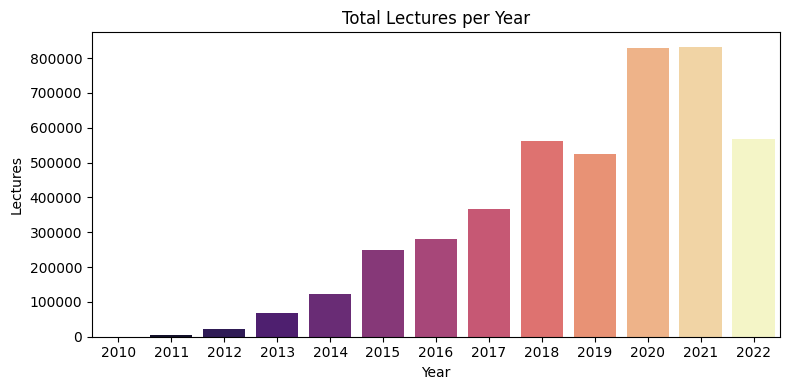

In [103]:
def annual_check(pivot):
  resource = {'id': 'Course Published',
              'num_subscribers': 'Subscribers',
              'num_reviews': 'Reviews',
              'num_comments':'Comments',
              'num_lectures': 'Lectures'}

  for key, val in resource.items():
    plt.figure(figsize=(8,4))
    sns.barplot(data=pivot,
                hue=pivot.index,
                x=pivot.index,
                y=pivot[key],
                palette='magma',
                legend=False)
    plt.title(f'Total {val} per Year')
    plt.xlabel('Year')
    plt.ylabel(val)

    plt.tight_layout()
    plt.show()

annual_check(datetime_convert(course_no_duplicate, ['published_time', 'last_update_date'])[2])

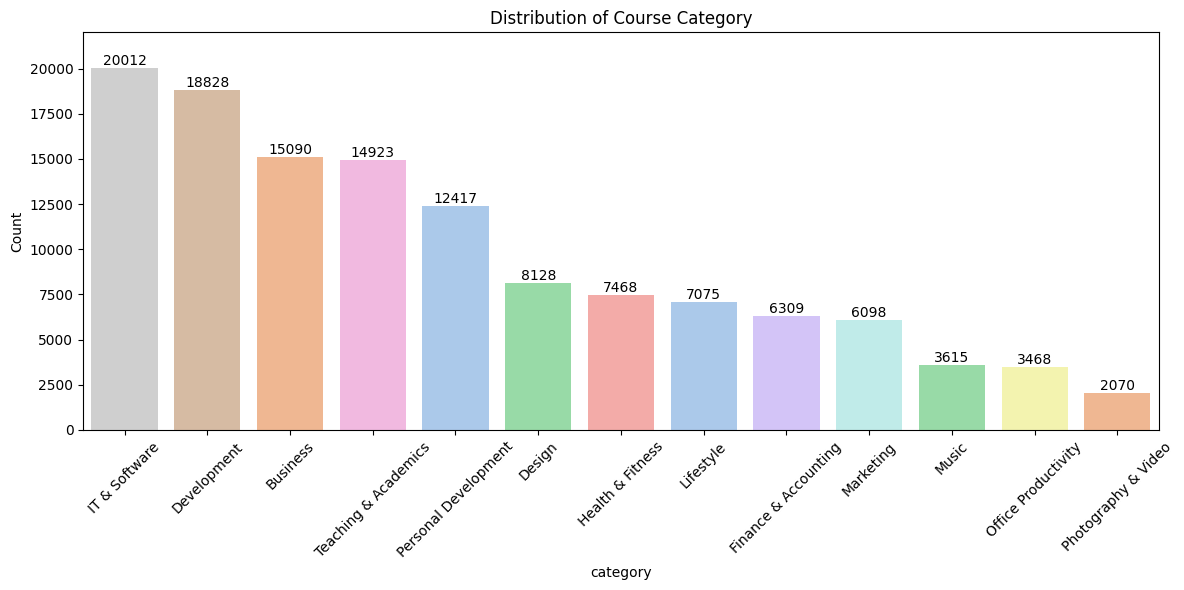

In [104]:
def category_check(data, feature):
  plt.figure(figsize=(12,6))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.ylim(0, max(data[feature].value_counts() + 2000))
  plt.ylabel('Count')
  plt.title('Distribution of Course Category')

  plt.tight_layout()
  plt.show()

category_check(course_no_duplicate, 'category')

In [105]:
def treemap(data, feature, target):
    fig = px.treemap(
        data,
        path=[feature, target],
        values=[1]*len(data))

    fig.update_traces(
        texttemplate='%{label}<br>%{value} (%{percentParent:.2%})',
        textposition="middle center")

    fig.show()

treemap(course_no_duplicate, 'category', 'subcategory')

Topics with more than 500 use
+-------------------------+---------+
| topic                   |   count |
+=========================+=========+
| Python                  |    1510 |
| Microsoft Certification |    1007 |
| Excel                   |     864 |
| WordPress               |     741 |
| JavaScript              |     694 |
| Java                    |     643 |
| Photoshop               |     639 |
| Meditation              |     619 |
| Math                    |     599 |
| AWS Certification       |     585 |
| English Language        |     541 |
| Yoga                    |     537 |
| Leadership              |     521 |
| Watercolor Painting     |     517 |
| Sales Skills            |     506 |
+-------------------------+---------+


<ipython-input-106-eebb4a1222de>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




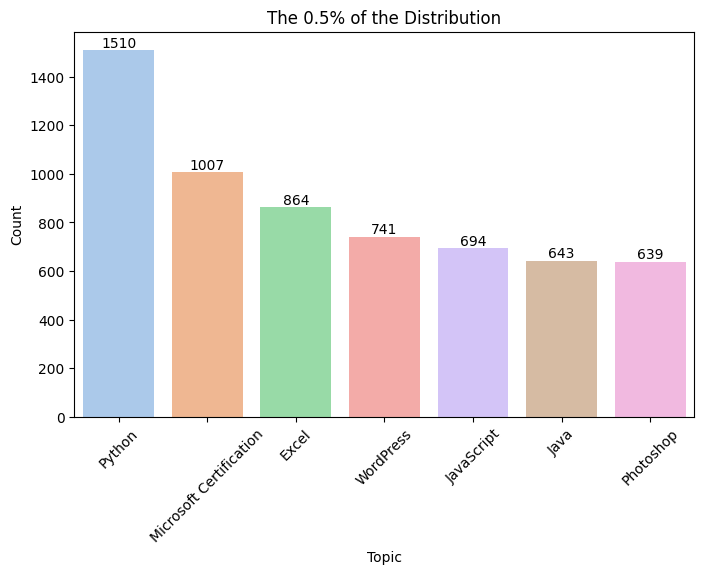

In [106]:
def topic_check(data, feature):
  topics = data[feature].value_counts()
  topics = topics[topics > 500]
  print("Topics with more than 500 use")
  print(topics.to_markdown(tablefmt='outline'))

  topics_count = data[feature].value_counts(normalize=True)
  significant_topic = topics_count[topics_count > 0.005].index
  grouped_topic = data[feature].apply(lambda n: n if n in significant_topic else 'Other')

  plt.figure(figsize=(8,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=significant_topic)

  for i in graph.containers:
    plt.bar_label(i, label_type='edge')

  plt.title('The 0.5% of the Distribution')
  plt.xlabel('Topic')
  plt.ylabel('Count')

  plt.xticks(rotation=45)

  plt.show()

topic_check(course_no_duplicate, 'topic')

In [107]:
def revenue_check(data):
  data = data.copy()
  data.loc[:,'revenue'] = data['price'] * data['num_subscribers']
  data.sort_values(by='revenue', ascending=False, inplace=True)

  leaderboard = data.groupby('instructor_name')['revenue'].sum().sort_values(ascending=False)

  summary = pd.DataFrame({
      'Instructor': leaderboard.index,
      'Revenue': leaderboard.values,
      'Total Course Published': data['instructor_name'].value_counts().sort_values(ascending=False).values,
      'Teaching Duration': data.groupby('instructor_name')['content_length_min'].sum().sort_values(ascending=False).values
  })


  return summary

revenue_check(course_no_duplicate)

,Instructor,Revenue,Total Course Published,Teaching Duration
0,Srinidhi Ranganathan,1.734934e+09,1254,387607.0
1,Learn Tech Plus,1.194135e+09,422,366847.0
2,TJ Walker,1.168882e+09,410,193361.0
3,Jose Portilla,8.161082e+08,327,181426.0
4,YouAccel Training,8.012222e+08,323,158359.0
...,...,...,...,...
42543,Ostap Soroka,0.000000e+00,1,0.0
42544,Chaitanaya Sethi,0.000000e+00,1,0.0
42545,Chaitali Patil,0.000000e+00,1,0.0
42546,Daria Vedunova,0.000000e+00,1,0.0


In [108]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209703 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [147]:
def features_type_separation(data):
  semantics = ['title', 'headline']
  nominal = ['is_paid', 'category', 'subcategory', 'topic' ,'instructor_name']
  datetime = ['published_time', 'last_update_date']

  return {'semantic': semantics,
          'nominal': nominal,
          'numeric': numerical,
          'datetime': datetime}

types = features_type_separation(course_no_duplicate)

In [139]:
type(types['nominal'])

list

In [141]:
def categorical_preprocessing(data, features):
  data = data[features].copy()
  data['is_paid'] = data['is_paid'].map({True: 1, False: 0})
  category = pd.get_dummies(data['category'], prefix='category', dtype=int)
  subcategory = pd.get_dummies(data['subcategory'], prefix='sub_category', dtype=int)
  topic = pd.get_dummies(data['topic'], prefix='topic', dtype=int)
  instructor = pd.get_dummies(data['instructor_name'], dtype=int)

  return data

categorical_preprocessing(course_no_duplicate, types['nominal'])

,is_paid,category,subcategory,topic,instructor_name
0,1,Lifestyle,Food & Beverage,Vegan Cooking,Angela Poch
1,0,Business,Entrepreneurship,Lean Startup,Eric Ries
2,1,Lifestyle,Other Lifestyle,Vegan Cooking,Angela Poch
3,1,Lifestyle,Pet Care & Training,Pet Training,Ian Dunbar
4,1,Design,Web Design,Web Design,E Learning Lab
...,...,...,...,...,...
209729,1,Teaching & Academics,Language Learning,Urdu Language,Jawaid Hameed
209730,1,IT & Software,IT Certifications,CompTIA Linux+,Jean-François d'Halluin
209731,1,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,Jean-François d'Halluin
209732,1,Finance & Accounting,Other Finance & Accounting,Financial Accounting,Niranjan Bhatia


In [142]:
def semantic_preprocessing(data, features):
  data = data[features].copy()

  return data

semantic_preprocessing(course_no_duplicate, types['semantic'])

,title,headline
0,Online Vegan Vegetarian Cooking School,Learn to cook delicious vegan recipes. Filmed ...
1,The Lean Startup Talk at Stanford E-Corner,Debunking Myths of Entrepreneurship A startup ...
2,"How To Become a Vegan, Vegetarian, or Flexitarian",Get the tools you need for a lifestyle change ...
3,How to Train a Puppy,Train your puppy the right way with Dr. Ian Du...
4,Web Design from the Ground Up,Learn web design online: Everything you need t...
...,...,...
209729,Let's Speak Urdu - The Urdu Grammar,Urdu - Become fluent in this beautiful South A...
209730,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,Practice Latest exam questions with detailed e...
209731,CISSP 4 full exams #1 : All CISSP domains - 12...,Practice Latest exam questions with detailed e...
209732,JD Edwards EnterpriseOne Fixed Assets Accounti...,Full-length course (Part-3 of 3) on JD Edwards...


In [148]:
def numeric_preprocessing(data, features):
  #winsorization
  #scaling
  #similarity

  data = data[features].copy()

  return data

numeric_preprocessing(course_no_duplicate, types['numeric'])

,price,num_subscribers,num_reviews,num_comments,num_lectures,content_length_min
0,24.99,2231.0,134.0,42.0,37.0,1268.0
1,0.00,26474.0,709.0,112.0,9.0,88.0
2,19.99,1713.0,41.0,13.0,14.0,82.0
3,199.99,4988.0,395.0,88.0,36.0,1511.0
4,159.99,1266.0,38.0,12.0,38.0,569.0
...,...,...,...,...,...,...
209729,19.99,3.0,0.0,0.0,5.0,54.0
209730,49.99,0.0,0.0,0.0,0.0,0.0
209731,49.99,0.0,0.0,0.0,0.0,0.0
209732,119.99,0.0,0.0,0.0,9.0,82.0


In [149]:
def datetime_preprocessing(data, features):
  data = data[features].copy()

  return data

datetime_preprocessing(course_no_duplicate, types['datetime'])

,published_time,last_update_date
0,2010-08-05T22:06:13Z,2020-11-06
1,2010-01-12T18:09:46Z,NaN
2,2010-10-13T18:07:17Z,2019-10-09
3,2011-06-20T20:08:38Z,2016-01-13
4,2011-06-23T18:31:20Z,NaN
...,...,...
209729,2022-10-05T11:31:36Z,2022-10-06
209730,2022-10-05T12:29:23Z,2022-10-05
209731,2022-10-05T11:04:05Z,2022-10-05
209732,2022-10-05T10:30:19Z,2022-10-05
